In [72]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import nbformat
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [73]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['axes.formatter.limits'] = (-5, 5)


Loading the dataset

In [74]:
data = pd.read_csv('house_price_regression_dataset.csv')

In [75]:
data

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.60,0,5,262382.85
1,4272,3,3,2016,4.75,1,6,985260.85
2,3592,1,2,2016,3.63,0,9,777977.39
3,966,1,2,1977,2.73,1,8,229698.92
4,4926,2,1,1993,4.70,0,8,1041740.86
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.17,2,10,701494.00
996,3179,1,2,1999,2.98,1,10,683723.16
997,2606,4,2,1962,4.06,0,2,572024.02
998,4723,5,2,1950,1.93,0,7,964865.30


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [77]:
data.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,2815.42,2.99,1.97,1986.55,2.78,1.02,5.62,618861.02
std,1255.51,1.43,0.82,20.63,1.30,0.81,2.89,253568.06
min,503.00,1.00,1.00,1950.00,0.51,0.00,1.00,111626.85
25%,1749.50,2.00,1.00,1969.00,1.67,0.00,3.00,401648.23
50%,2862.50,3.00,2.00,1986.00,2.81,1.00,6.00,628267.29
75%,3849.50,4.00,3.00,2004.25,3.92,2.00,8.00,827141.28
max,4999.00,5.00,3.00,2022.00,4.99,2.00,10.00,1108236.84


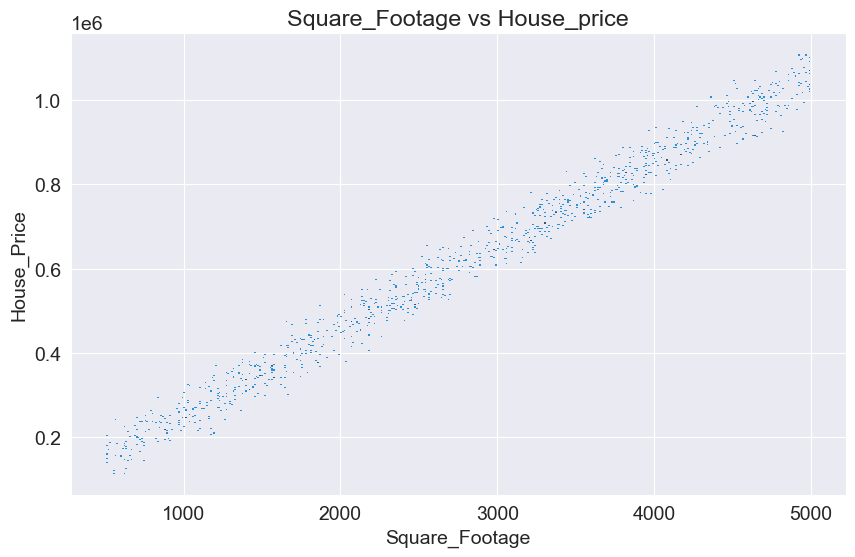

In [78]:
sns.histplot(data = data,
             x = 'Square_Footage',
             y = 'House_Price',
             bins = 400)
plt.title('Square_Footage vs House_price')
plt.show()

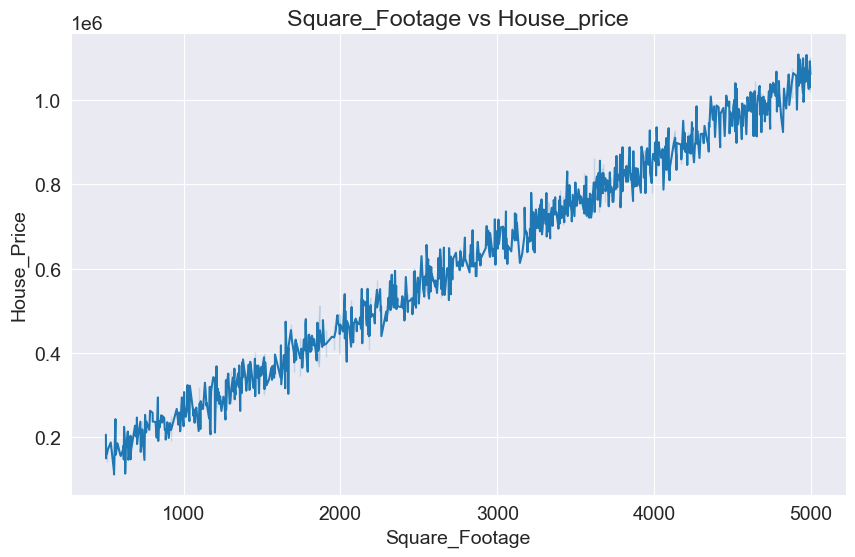

In [79]:
sns.lineplot(data = data,
             x = 'Square_Footage',
             y = 'House_Price')
plt.title('Square_Footage vs House_price')
plt.show()

Below is linear regression using a single feature that is square_footage

In [88]:
def estimate_price(sq,m,c):
  return m*sq + c

In [89]:
sq = data.Square_Footage
m = 50
c = 100

In [90]:
estimated_price = estimate_price(sq, m, c)

Text(0, 0.5, 'Price')

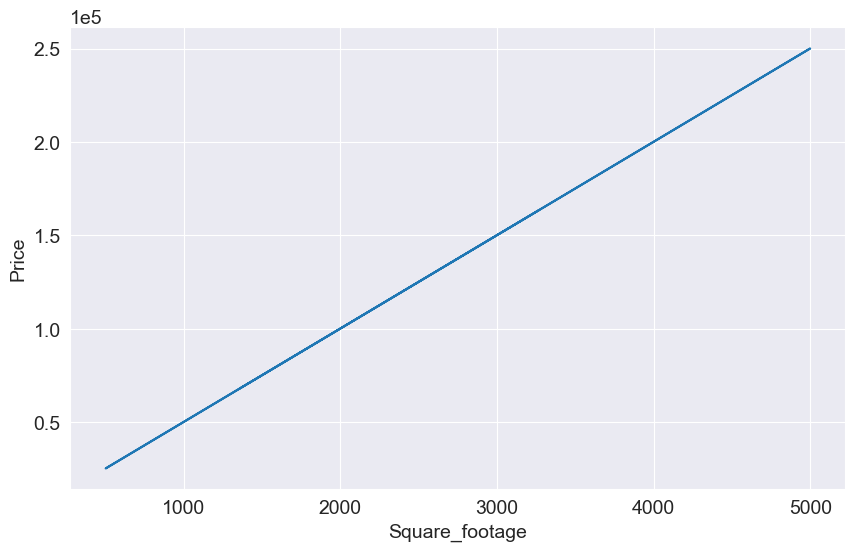

In [91]:
plt.plot(sq, estimated_price)
plt.xlabel('Square_footage')
plt.ylabel('Price')

In [96]:
def try_parameters(m, c):
  sq = data.Square_Footage
  target = data.House_Price

  estimated_prices = estimate_price(sq, m, c)

  plt.plot(sq, estimated_prices, 'r', alpha = 0.9)
  plt.scatter(sq, target, s=8, alpha = 0.8)
  plt.xlabel('Sqaure_Footage')
  plt.ylabel('House_Price')
  plt.legend(['Estimate','Actual'])

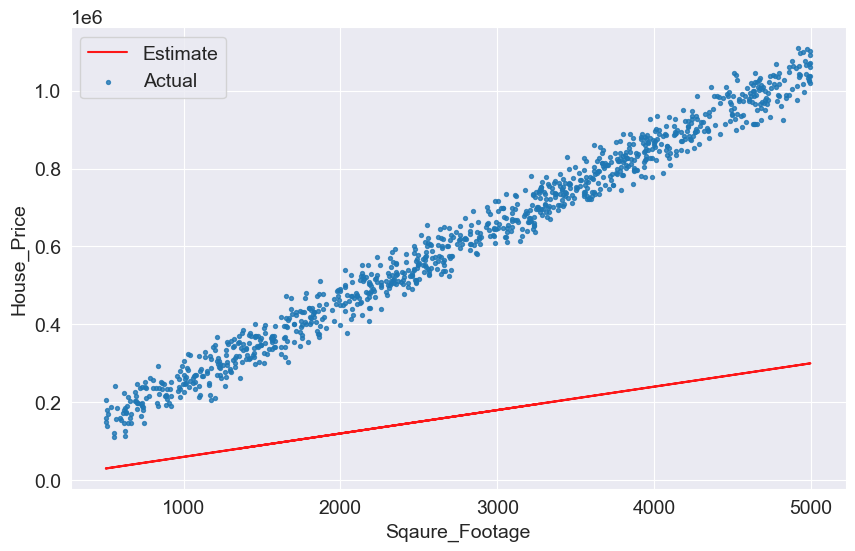

In [99]:
try_parameters(60,200)

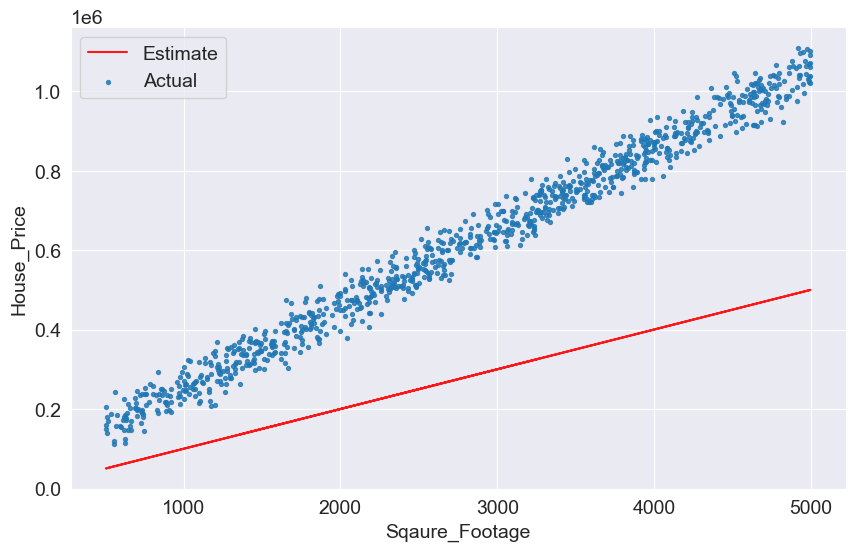

In [100]:
try_parameters(100,400)

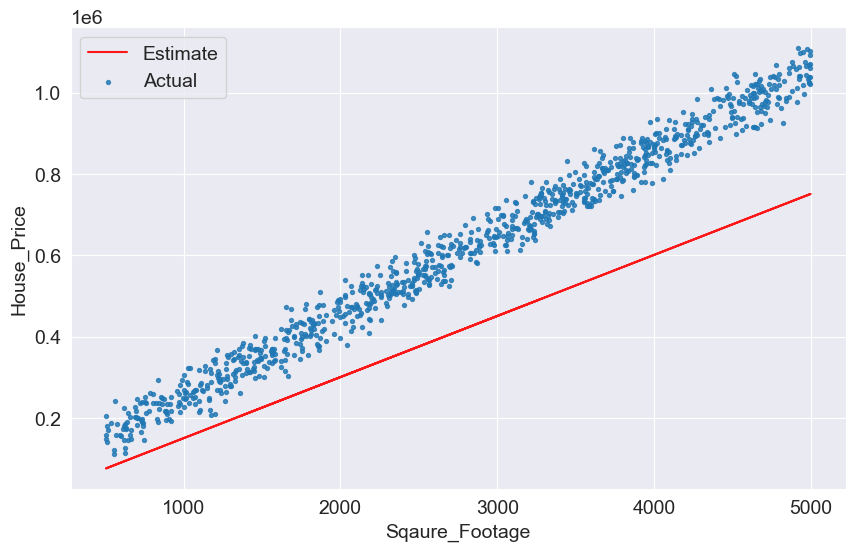

In [101]:
try_parameters(150, 800)

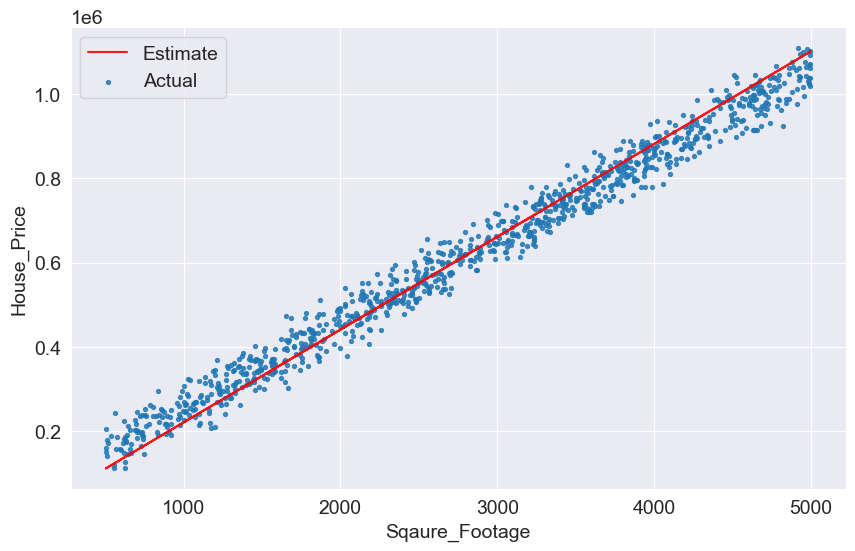

In [106]:
try_parameters(220, 1200)

Calculating Root Mean Squared Error(RMSE)

In [110]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

In [111]:
m = 220
c = 1200

In [112]:
targets = data.House_Price
predictions = estimate_price(data.Square_Footage, m, c)
rmse(targets, predictions)

41691.06232392002